<a href="https://colab.research.google.com/github/BrMrtn/GoogleColab/blob/main/MI/iMSc_Konvolucios_Neuralis_Halok_2024_v3_hallgatoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

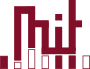 Mesterséges Intelligencia és Rendszertervezés Tanszék, ©2024. BME-MIT, Révy Gábor, Dr. Hullám Gábor  
# **VIMIAC16 - Mesterséges Intelligencia**
## 2024. Őszi félév
## **IMSc Laborgyakorlat - Konvolúciós neurális hálók**

## A labor célja
A labor célja, hogy a hallgatókat megismertesse a konvolúciós neurális hálók működésével és használatával, mely mára már megkerülhetelen az automatikus képfeldolgozás és a gépi látás területén.

# E. Elméleti háttér



## E.1 Matematikai alapok: Vektorok

A koordinátageometriából ismert vektorokat rendszerint $[a, b]$ rendezett számpárokkal jelöljük, melyek első elemét (vagy $x$ koordinátáját) a Descartes féle koordinátarendszer y tengelyétől mért távolságként, második elemét (vagy $y$ koordinátáját) az x tengelytől mért távolságként tudjuk értelmezni. Így a helyvektort ábrázolni tudjuk, az origóból az $x = a$, $y = b$ pontba mutató nyíllal.
Ilyen számpárok segítségével a sík minden pontja jellemezhető és a pontokból alkotott halmazokkal a síkbeli alkazatok is előállíthatók. (Pl.: egyenes egyenlete: azon $[a, b]$ koordinátájú pontok halmaza a síkon melyekre valamely $w_0$, $w_1$ súlyok mellett igaz, hogy $b = a * w_1 + w_0$, kör egyenlete, stb.)

#### **Műveletek vektorokkal**

Korábbi ismereteinkből tudjuk, hogy
- Két vektor összege: $$ [a_1, b_1] + [a_2, b_2]  = [a_1+a_2, b_1+b_2],$$ a koordinátánkénti összegből alkotott számpár.
- Egy vektor számszorosa: $$ c \cdot [a_1, b_1]  = [c \cdot a_1, c \cdot b_1],$$ a koordináták adott számszorosából alkotott számpár.
- Két vektor skaláris szorzata: $$\langle [a_1, b_1], [a_2, b_2] \rangle = a_1  \cdot a_2 + b_1 \cdot b_2,$$ az összetartozó koordináták szorzatainak összege. Fontos kiemelni, hogy ennek a műveletnek az eredménye a korábbi kettővel ellentétben nem vektor, hanem egy szám (skalár).

#### **Távolság**

Két pont közötti távolság mérésére több lehetséges módszer is adódik. Az első és mindenki által ismert az euklideszi távolság, melynek számítása $P_1=[a_1, b_1]$ és $P_2=[a_2, b_2]$ pontok esetén $$d_e(P_1, P_2) =  \sqrt{(a_1-a_2)^2 + (b_1-b_2)^2 }.$$

Ezen túl azonban bizonyos problémák esetén érdemes más fajta távolság mértéket alkalmazni. Egy híres példa a megszokott euklideszi távolságtól különböző távolság mértékre a Manhattan távolság, mely nevét Manhattan híresen szabályos utcáiról kapta. Kiszámítása $P_1=[a_1, b_1]$ és $P_2=[a_2, b_2]$ pontok esetén $$d_e(P_1, P_2) = |a_1-a_2| + |b_1-b_2|,$$ tehát a távolság az x koordináták különbségéhez hozzáadva az y koordináták különbsége. Mintha csak Manhattan két pontja között számolnánk ki, hogy mennyi sétával juthatunk el az egyik pontból a másikba.

Szélsőséges példa, de ha meggondoljuk, a háromszög egyenlőtlenség teljesül rá, és bizonyos esetekben hasznos lehet a következő távolságfüggvény:
$$d_0(P_1, P_2)=\begin{cases} 0, & a_1=a_2 \;\text{és}\; b_1=b_2 \text{ esetén} \\  1, & \text{egyébként}. \end{cases}$$

#### **Magasabb dimenziós vektorok**
A vektorok fogalmát kiterjeszthetjük rendezett számhármasokra. Így lehetőségünk van például térbeli pontoknak és alakzatoknak a fentihez hasonló leírására. Számhármasokon a fentiekhez hasonlóan definiálhatjuk a három alapműveletet és a távolság mértékek is kiterjeszthetőek a célnak megfelelően.

Így a skaláris szorzat például:
$$\langle [a_1, b_1, c_1], [a_2, b_2, c_2] \rangle = a_1 \cdot a_2 + b_1 \cdot b_2 + c_1 \cdot c_2,$$
két pont euklideszi távolsága pedig
 $$d_e(P_1, P_2) =  \sqrt{(a_1-a_2)^2 + (b_1-b_2)^2 + (c_1-c_2)^2}$$ alakban írható fel.

Semmi elméleti akadálya nincsen annak, hogy a vektor fogalmunkat a továbbiakban kiterjesszük szám _n-esekre_, így az n dimenziós tér vektoraira és pontjaira szintén gond nélkül értelmezni tudjuk a korábbi műveleteket és távolságokat. Természetesen ezekhez a pontokhoz és vektorokhoz nem tudunk könnyen értelmezhető ábrákat készíteni vagy a belőlük alkotott alakzatokat elképzelni, de a műveletek alapos ismerete lehetővé teszi, hogy mégis dolgozzunk velük és következtetéseket vonjunk le az általuk leírt világról.

Vegyünk egy példát magasabb dimenziós adatra. Ha egy orvos két számmal akarja leírni a betegeit, megteheti, hogy egy $[$_magasság, testsúly_$]$ vektort rendel minden pácienséhez. A pácienseiről a rendelkezésére álló adatok alapján diagramot készíthet, amin a hasonló testfelépítésű emberekhez tartozó adatpontok közel lesznek egymáshoz. Azt mondhatjuk, hogy ha két vektor távolsága kicsi, akkor a két páciens hasonló, ha ez a távolság $0$, akkor a rendelkezésre álló adatok alapján megkülönböztethetetlenek.

Ha az orvos könnyebben megkülönböztethetővé akarja tenni pácienseit, megteheti, hogy a $[$_magasság, testsúly, életkor_$]$ vektor alapján ábrázolja őket egy háromdimenziós diagramon. Látható, hogy így korábban megkülönböztethetelen emberek akár "20 év távolságba" is kerülhetnek egymástól. További adatok hozzávételével még alaposabb ismereteket szerezhetünk a pácienseinkről. Tegyük fel, hogy rendelkezésünkre áll $[$_magasság, testsúly, életkor, pulzus, szisztolés vérnyomás, diasztolés vérnyomás, test hőmérséklet, szem dioptria, stb..._$]$ vektor. Ekkor már nem egyszerű feladat szemléletes ábrát készíteni a páciensekről, viszont megpróbálkozhatunk például hasonló állapotú páciensek keresésével, hogy azonosítsuk egy betegség potenciális áldozatait. Ehhez megpróbálkozhatunk azzal, hogy adott betegséggel megfertőzött emberekhez tartozó pontokhoz közeli pontokat keresünk a számontartott többi pont között. Ha találunk elég közeli pontokat, akkor az adott pácienseket figyelmeztethetjük, vagy elküldhetjük szűrésre, ezzel megelőzve a nagyobb bajt.

Azt is megtehetjük, hogy az egész teret előre felosztjuk zónákra aszerint, hogy az ott lévő pontok (amikhez még nem is feltétlenül tartozik valós páciens) feltételezhetően egészségesek vagy betegek lennének a rendelkezésünkre álló adatok alapján. Így ha egy új páciens érkezik, akkor az előírt általános vizsgálatok elvégzése után könnyen eldönthetjük, hogy el kell-e küldeni további speciális vizsgálatra.



##E.2 Konvolúció
A konvolúció a jelfeldolgozásban és azon belül a képfeldolgozásban is gyakran használt művelet. A művelet kimerítő és matematikailag pontos definíciója helyett nézzünk egy példát a képfeldolgozási alkalmazások szempontjából legfontosabb diszkrét 2D konvolúcióra.

<center><img width="500" height="280" src="https://miro.medium.com/max/669/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif">
<a href="https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1">forrás</a>
</center>

Legyen adott az 5x5-ös $A$ matrix, azaz a bemeneti kép, továbbá vegyünk egy 3x3-mas $K$ mátrixot (ennek neve kernel mátrix):

$$
A=
\left(\begin{array}{cc}
3 & 3 & 2 & 1 & 0\\
0 & 0 & 1 & 3 & 1\\
3 & 1 & 2 & 2 & 3\\
2 & 0 & 0 & 2 & 2\\
2 & 0 & 0 & 0 & 1
\end{array}\right)
K =
\left(\begin{array}{cc}
0 & 1 & 2\\
2 & 2 & 0\\
0 & 1 & 2
\end{array}\right)
$$

Jelölje $A * K$ a két mátrix konvolúcióját. Ekkor az $A * K = B$ mátrix egyes elemeit a következőképpen számíthatjuk: a $K$ mátrixot az $A$ mátrix fölött az összes lehetséges pozíción "végigcsúsztatjuk", és minden pozícióban kiszámoljuk az azonos pozíciójú elemek szorzatát, majd az így kapott értékeket összeadjuk. Az animációban is szemléltetett módon elvégezve a műveletet a következőt kapjuk:
$$A * K = B =
\left(\begin{array}{cc}
12 & 12 & 17\\
10 & 17 & 19\\
9 & 6 & 14
\end{array}\right),$$
ahol például $14 = 2 \cdot 0+2 \cdot 1+3 \cdot 2+0 \cdot 2+2 \cdot 2+2 \cdot 0+0 \cdot 0+0 \cdot 1+1 \cdot 2$

Jól látható, hogy így a kimeneti $B$ mérete kisebb mint az $A$ bemeneté. Ahhoz, hogy ezt elkerüljük, a bemenetet körben ki kell egészíteni plusz pixelekkel. Erre a kitöltésre több mód is van, de a laggyakoribb a nullákkal való kitöltés. Ezt a kiegészítést nevezik _padding_-nek. Példa animáció látható erre is a fenti animáció forrását követve.


## E.3 Konvolúciós neurális háló

A konvolúció művelete a képfeldolgozásban különösen jelentős. Kereskedelmi forgalomban lévő képszerkesztő alkalmazásokban is találkozhatunk rejtett, vagy direkt alkalmazásával. Használható képek élesítésére,  jellemzők kiemelésére, vagy sok egyéb, bonyolultabb szűrő megvalósítására.

Különböző konvolúciós kernelek közvetlen alkalmazásának eredménye:

elmosás
<center><img src="https://www.pyimagesearch.com/wp-content/uploads/2016/06/convolutions_opencv_largeblur-768x286.jpg" width="350"></center>

élesítés
<center><img src="https://www.pyimagesearch.com/wp-content/uploads/2016/06/convolutions_opencv_sharpen-768x288.jpg" width="350"></center>

élkiemelés
<center><img src="https://www.pyimagesearch.com/wp-content/uploads/2016/06/convolutions_opencv_sobelx-768x295.jpg" width="350"></center>

[ebben](https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/) a tutorialban.

Mint ahogy sima előrecsatolt neurális hálónál is az volt a célunk, hogy bizonyos paramétereit egy modellnek ne előzetes számolással kelljen meghatározni, hanem optimalizáció útján kaphassuk meg, a konvolúciós neurális hálók (CNN - Convolutional Neural Network) esetében is ez a célunk: olyan kernelek tanulása, melyek a kép különböző jellemzőit kiemelve segítik a hálót az automatikus döntéshozásban.

Ehhez a korábbi neurális hálóhoz hasonló struktúrát fogunk alkalmazni, de a számokat előállító neuronok helyére ebben az esetben képeket (kép mátrixokat) előállító csatornákat teszünk. Az egymás utáni rétegek közötti súlyokat pedig  konvolúciós kernelekre cseréljük.

A jellemző kiemelő konvolúciós rétegek mellett még rengeteg féle rétege lehet egy CNN-nek. Ezek közül most még az átméretező rétegeket emelnénk ki. Ezek szükségességét az indokolja, hogy a bemeneti képek jellemzően nagy felbontásúak, de kevés információt tartalmaznak. (Egy-egy objektum per kép.) Az információk tömörebb ábrázolásának és könnyebb feldolgozásának érdekében a képeket egyre zsugorítjuk. Ehhez _pooling rétegeket_ használunk, melyek közül a MaxPooling a 3. feladatban elő is kerül. Ennek működése egyszerű: beállítható ablakmérettel (a konvolúcióhoz hasonlóan) végigpásztázunk a képen és minden ablakból kiválasztjuk a maximum értéket. Ezt rendszerint nem átlapoló ablakokkal tesszük, hanem a lépésköz mindig megegyezik az ablak méretével.

Nézzünk egy példát $2\times2$-es ablakméretű MaxPoolingra:
$$
\left(\begin{array}{cc}
7 & 3 & 5 & 2\\
8 & 7 & 1 & 6\\
4 & 9 & 3 & 9\\
0 & 8 & 4 & 5
\end{array}\right)
\Rightarrow
\left(\begin{array}{cc}
8 & 6\\
9 & 9
\end{array}\right)
$$

Szemléletesen mutaja be a konvolúciós és maxpooling réteg egymás után alkalmazását [ez a példaprojekt](http://scs.ryerson.ca/~aharley/vis/conv/flat.html), melyekben kézzel írt számjegyek felismeréséhez használtak CNN-t az alkotók.

Jellemző ezekre a modellekre, hogy az egyre mélyebb és mélyebb rétegekben már ember számára nem is értelmezhetőek azok a jellemzők, amik a hálót a döntés meghozatalához segítik.

</center>

Az alábbi táblázat egy jó ökölszabályt mutat arra, hogy a feladat függvényében hogyan érdemes beállítani a neurális hálózat bizonyos tulajdonságait.

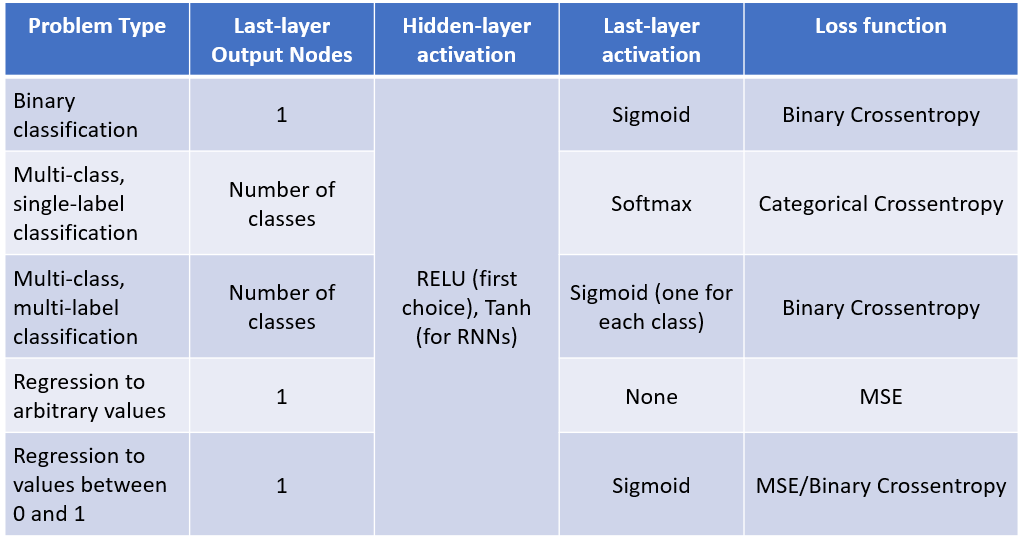

Alább láthatóak a leggyakoribb aktivációs függvények.  

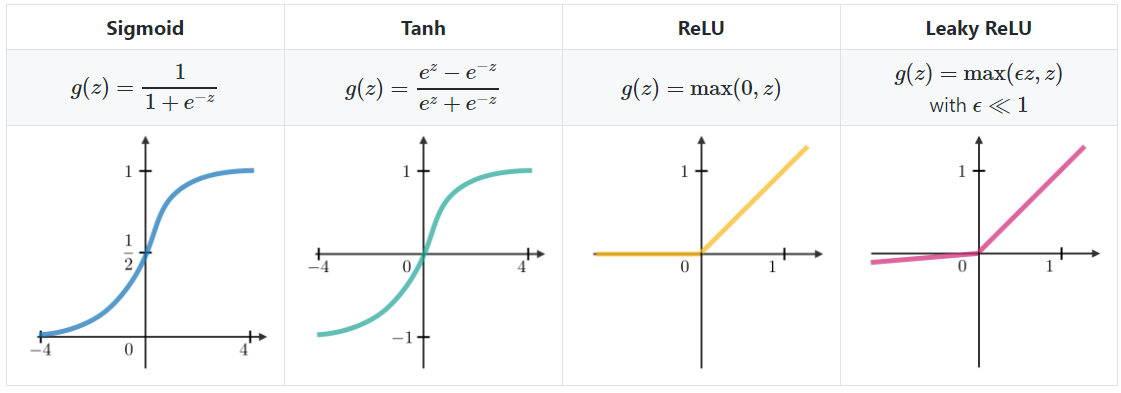

# 0. Előkészítés

A Runtime menüpont alatt a Change runtime type pontra kattintva állítsa át a "hardware accelerator type" beállítást GPU-ra, hogy azt használja a futási környezet hardware-es gyorsítóként!

# F1. Képek osztályozása

Ebben a feladatban kutya és macska képeket fogunk osztályozni. A neurális hálózat bemenete tehát egy RGB kép (magasság x szélesség x 3), kimenete pedig az osztály bináris (0 vagy 1) enkódolással.

Az adathalmaz, amit használni fogunk: [Cats vs Dogs
](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs)

Az adatok kezeléséhez pedig a tensorflow [Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) API-ját fogjuk használni.

Importáljuk a szükséges csomagokat:
- [tensorflow](https://https://www.tensorflow.org/overview): nyílt forráskódú könyvtár gépi tanuláshoz, melyet modellek építéséhez, tanításához és kiértékeléséhez fogunk használni.
- [numpy](https://https://numpy.org/): a könyvtár széleskörű támogatást nyújt sokdimenziós tömbök és mátrixok tárolásához, valamint az ezekkel végzett matematikai műveletekhez, függvényekhez. A mai laboron az adathalmazok előállításához és ábrázolásához fogjuk használni.
- [matplotlib.pyplot](https://matplotlib.org/api/pyplot_api.html): ábrák készítéséhez és megjelenítéséhez.
- os: operációs rendszer műveletekhez, mint fájl olvasás, letöltés, stb.


In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# check tf version
print(tf.__version__)

gpus = tf.config.list_physical_devices('GPU')
for device in gpus:
    tf.config.experimental.set_memory_growth(device, True)
    print(f"Found GPU {device.name}, and set memory growth to True.")

## F1.1 Adatok beolvasása

Az adathalmaz letöltését és szétvágását megtehetjük a `tensorflow_datasets.load` függvénnyel.
Neurális hálózatok tanításkor 3 adathalmazt szoktunk használni:
 - tanító (train): közvetlenül csak ezeken az adatmintákon tanul a neurális hálózat
 - validációs (validation) adathalmaz: tanítás közben használjuk a modell teljesítményének kiértékelésére; ha ezen nem javul a teljesímény, akkor érdemes leállítani a tanítást
 - teszt (test) adathalmaz: a tanítás után ezen értékeljük ki a modellt; a validációs adathalmaztól független kell, hogy legyen, mivel a validációs adathalmaz a tanítás paramétereinek meghatározásában közrejátszik

Mivel az adathalmaz eredetileg nem tartalmaz validációs és teszt partíciót, ezért a `train` (tanító) részt fogjuk 80%/10%/10% (train/validation/test) arányban kettévágni.
Ehhez használjuk a [Slicing API-t](https://www.tensorflow.org/datasets/splits). Itt érdemes megnézni a Slicing $→$ Percent lehetőséget.

Az eredeti *train* adathalmazt felhasználva hozzunk létre tanító, validációs és teszt partíciókat!

In [ ]:
(train_dataset, val_dataset, test_dataset), dataset_info = \
            tfds.load('cats_vs_dogs',
                      # TODO:
                      split= ,
                      shuffle_files=False, with_info=True, as_supervised=True)

classes = dataset_info.features['label'].names  # label name of the classes
n_classes = len(classes)  # number of classes

## F1.2 Adathalmaz megismerése

Az alábbi kódblokk futtatásával mintákat láthatunk a tanító adathalmazból, ami kutya-macska képeket és a képnek megfelelő címkét tartalmazza.

In [ ]:
tfds.visualization.show_examples(train_dataset, dataset_info);

## F1.3 Adatok előkészítése

A tanításhoz az adatokat megkeverjük, a képeket normalizáljuk a $[0, 1]$ tartományba, fix méretre (256 x 256) átméretezzük és batch-eket (tanító csomagokat) készítünk. A batch-ek létrehozására azért van szükség, mert az összes kép + címke nem fér el egyszerre a memóriában.

In [ ]:
IMAGE_RESOLUTION = 256
def resize_image(image, label):
  image = tf.image.resize_with_pad(image, IMAGE_RESOLUTION, IMAGE_RESOLUTION) / 255.
  return image, label

BATCH_SIZE = 64
train_batches = train_dataset.shuffle(len(train_dataset)//4).map(resize_image).batch(BATCH_SIZE).prefetch(1)
val_batches = val_dataset.map(resize_image).batch(BATCH_SIZE).prefetch(1)
test_batches = test_dataset.map(resize_image).batch(BATCH_SIZE).prefetch(1)

In [ ]:
print('dataset:')
print(f'  # training images: {len(train_dataset)}')
print(f'  # validation images: {len(val_dataset)}')
print(f'  # test images: {len(test_dataset)}')

Nézzük meg, hogy kellően kiegyenlített-e az adat! Ha ugyanis az egyik osztály nagymértékben felülreprezentált, és ezt nem kezeljük, akkor a háló csak azt fogja megtanulni, hogy melyik osztályra való tippeléssel ér el jobb eredményt.

In [ ]:
def plot_label_frequencies(ds_names, ds, classes):
  fig_ds, axes = plt.subplots(1, 3, figsize=(10, 4))
  for i, (ds_type, ds) in enumerate(zip(ds_names, ds)):
    labels = [x[1].numpy() for x in ds]
    bin_edges = np.concatenate(([-.5], np.arange(len(classes))+.5))
    axes[i].hist(labels, bins=bin_edges, density=False, rwidth=0.6)
    axes[i].set_title(ds_type)
    axes[i].set_xticks(np.arange(len(classes)))
    axes[i].set_xticklabels(classes)
plot_label_frequencies(['Training', 'Validation', 'Test'], [train_dataset, val_dataset, test_dataset], classes)

## F1.4 Neurális hálózat definiálása

Az adat már elő van készítve, most hozzuk létre a neurális hálózatot. Ehhez válaszolja meg a következő kérdéseket! *(Segítség: a fenti [táblázatban](#scrollTo=yQAxWoppa3MY&line=1&uniqifier=1) látható **Binary classification** típusú problémába tartozik a mostani feladat.)*

Mekkora lesz a bemenet mérete? (a batch méretétől most tekintsünk el)
```
# TODO:
```
\
Mekkora lesz a kimenet mérete?
```
# TODO:
```
\
Milyen aktivációs függvényt érdemes használni?
```
# TODO:
```
\
Milyen hibafüggvényt érdemes használni?
```
# TODO:
```


A neurális hálózat létrehozásához a tensorflow [Functional API](https://www.tensorflow.org/guide/keras/functional#use_the_same_graph_of_layers_to_define_multiple_models)-ját fogjuk használni. Ezzel rugalmasan lehet a hálókat leírni. Figyeljük meg, hogy a létrehozott réteget mindig meg kell hívni az előző réteggel (ez egy szimbolikus tenzor, ami alapján az API össze tudja kötni a rétegeket). Példa egy 5 bemenetű, 4 rétegű háló leírására:

```
inputs = Input(shape=(5,))  # 1., bemeneti réteg
x = layers.Dense(64, activation="relu")(inputs)  # 2. réteg
x = layers.Dense(64, activation="relu")(x)  # 3. réteg
outputs = layers.Dense(10)(x) # 4. réteg

# modell definiálása a bemenetekkel és kimenetekkel:
model = keras.Model(inputs=inputs, outputs=outputs, name="my_model")  
```

Definiáljuk a következő hálót:
- bemeneti réteg
- 2D konvolúciós réteg 16 filterrel (channel, csatorna), $3\times3$-as kernellel, `padding='same'` paddeléssel, **ReLU** aktivációval

- MaxPooling réteg ($2\times2$-es kernel méret, `padding='valid'`, de ezek a default paraméterek)
- 2D konvolúciós réteg **32** filterrel$^*$
- MaxPooling réteg
- 2D konvolúciós réteg **64** filterrel$^*$
- MaxPooling réteg
- 2D konvolúciós réteg **128** filterrel$^*$
- MaxPooling réteg
- 2D konvolúciós réteg **32** filterrel$^*$
- MaxPooling réteg
- előző réteget kilapító réteg (flatten)
- teljesen összekötött (dense) réteg **64** neuronnal, **ReLU** aktivációval
- teljesen összekötött réteg **32** neuronnal, **ReLU** aktivációval
- teljesen összekötött, kimeneti réteg, megfelelő számú neuronnal és megfelelő aktivációs függvénnyel

$^*$: azt jelzi, hogy a további paraméterek ugyanazok, mint a korábbi, ugyanolyan típusú rétegnél

A rétegtípusok dokumentációi [itt](https://www.tensorflow.org/api_docs/python/tf/keras/layers) találhatók.\
A modell bemenettel és kimenettel való definiálása [itt](https://www.tensorflow.org/api_docs/python/tf/keras/Model#args) található.

A szükséges rétegtípusok a következő blokkban importálva vannak, azokat már csak a megfelelő módon példányosítani kell.

In [ ]:
from tensorflow.keras.layers import Flatten, Conv2D, Dense, Input, MaxPooling2D, Dropout
from tensorflow.keras import Model

In [ ]:
# TODO
input =
x = ...(input)
x = ...(x)
...
output = ...(x)
# TODO

dvc_classification_model = Model(inputs=input, outputs=output, name='dvc_classification_model')
dvc_classification_model.summary()

## F1.5 Háló konfigurálása

Konfiguráljuk a modellt a tanításhoz! Ehhez a modell [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) függvényét használjuk. A következő paramétereket kell megadnunk:
- optimalizáló ([tf.keras.optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)): használjunk Adam optimalizálót
- hibafüggvény ([tf.keras.losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses/)): a bináris osztályzásnak megfelelően
- [metrika](https://www.tensorflow.org/api_docs/python/tf/keras/metrics): lista, megadja, hogy milyen metrikákat használjunk a tanítás során a teljesítmény mérésére. Most használjunk pontosságot (`accuracy`).

In [ ]:
dvc_classification_model.compile(
    # TODO:
    optimizer=,
    loss=,
    metrics=)

## F1.6 Tanítás

Annak érdekében, hogy ne tanuljon túl a modellünk, itt is checkpointot használunk. Az utoljára kimentett modell súlyait a tanítás végén visszatöltjük.

A `fit()` függvénynek a következő paramétereket kell megadnunk:
- `x:` tanító adathalmaz\
most mindent a Dataset API kezel, tehát csak a megfelelő`tf.Dataset` objektumot kell átadni
- `epochs:` hányszor tanuljon a háló a tanító adathalmazon\
egy epoch során minden adatot egyszer lát a neurális hálózat\
kezdetnek állítsuk be az értékét a `n_epochs` változóra
- `validation data:` validációs adathalmaz, amin tanítás közben mérjük a hálózat teljesítményét\
szintén csak a megfelelő`tf.Dataset` objektumot kell átadni
- `callbacks:` listában kell felsorolni a callbackeket\
egyetlen checkpointer callback-et használunk

In [ ]:
n_epochs = 10  # number of epochs to train the neural network
# checkpointing based on the validation loss
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('dvc_classification_model.keras', monitor='val_loss', save_best_only=True, save_weights_only=False, verbose=1)
# model training
dvc_history = dvc_classification_model.fit(x=, epochs=, validation_data=,  # TODO
                                           callbacks=)
dvc_classification_model.load_weights('dvc_classification_model.keras')  # load weights back

Az alábbi kódblokk lefuttatásával láthatjuk, hogy a tanítás során hogyan alakultak a hibaértékek.

In [ ]:
def plot_training_graphs():
  plt.plot(dvc_history.history['loss'])
  plt.plot(dvc_history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['loss', 'val_loss'], loc='upper left')
plot_training_graphs()

Mi figyelhető meg a görbéken (hogyan változnak az értékek a görbék mentén, ill. a görbék egymáshoz való viszonya hogyan változik)? Mit jelent ez?

```
# TODO:
```


Hogyan változtatna ez alapján a tanításon?

```
# TODO:
```

## F1.7 Kiértékelés

[Értékeljük](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) ki a modellünk teljesítményét a teszt adathalmazon:

In [ ]:
# TODO
dvc_classification_loss, dvc_classification_acc = dvc_classification_model...

Mekkora a pontossága a modellnek?
```
# TODO:
```
\
Mit jelent ez?
```
# TODO:
```

## Példák a predikcióra

In [ ]:
def plot_test_examples(test_ds, model):
  test_example_batch = test_batches.take(1)
  pred = np.squeeze(model.predict(test_example_batch))
  dog_probs = pred
  probs = np.stack([1-dog_probs, dog_probs]).T
  imgs, labels = list(test_example_batch)[0]
  n_examples = len(imgs)
  n_cols = 5
  n_rows = (n_examples-1)//5+1
  fig_test, axes_test = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows*6))
  axes_test_flatten = axes_test.flatten()
  [a.axis('off') for a in axes_test_flatten]
  for i in range(n_examples):
    axes_test_flatten[i].imshow(imgs[i])
    prob_text = ',\n'.join([f'{c}: {p:.2f}' for c, p in zip(classes, probs[i])])
    text = f'{classes[labels[i]]}\n{prob_text}'
    color = 'green' if np.argmax(probs[i]) == labels[i] else 'red'
    axes_test_flatten[i].set_title(text, wrap=True, color=color)

plot_test_examples(test_batches, dvc_classification_model)

Amennyiben a teszt halmazon mért pontosság `0.75` alatti, javítson a modellen! Ezt a paraméterek változtatásával teheti meg. Javaslatok:
- konvolúciós rétegek száma
- filterek száma a konvolúciós rétegekben
- teljesen összekötött rétegek száma / az abban található neuronok száma
- dropout rétegek használata a maxpooling rétegek után
- epochok száma

Tipp: Általánosan érdemes törekedni arra, hogy a modell paramétereinek száma ne legyen túlzottan magas, különös tekintettel a teljesen összekötött réteg(ek) paramétereire.

# F2. Magyarázatgenerálás "black-box" modellekhez

Ebben a példában megvizsgáljuk az összetett modellek kimenetének magyarázhatóságát, az előző (3-as) feladat által is használt "kutya-macska" képosztályozási problémán keresztül.

Tekintve, hogy a neurális háló modellek paramétereinek száma bonyolultabb problémák (pl. képfeldolgozó vagy nyelvi modellek) esetén a százezres nagyságrendtől egészen milliárdos nagyságrendig terjed, a modell működésének a paraméterek közvetlen vizsgálatával történő megértése rendkívül nehéz, jellemzően kivitelezhetetlen feladat.
Ebből eredően a modern modellmagyarázó módszerek célja, hogy valamilyen hatásvizsgálat segítségével megállapítsák, hogy a modell kimenetének meghatározásában mely bemeneti paraméterek játszanak jelentős szerepet, így betekintést engedve azon "szempontrendszerbe", amely alapján a predikció előállt.

A leggyakoribb magyarázatgenerálásra használt módszerek alapvetően két fő csoportba sorolhatók: (1) a modellfüggetlen módszerek (nevükből is sejthető módon) pusztán a modell bemenetére, és az arra adott kimenetre ("válaszra") koncentrálnak, míg (2) a modellspecifikus módszerek a modell struktúráját és paramétereit is figyelembe veszik a hatásvizsgálat során.

A gyakorlati rész megkezdése előtt fontos megjegyezni, hogy habár a jelen példában képosztályozó modellek magyarázásával foglalkozunk, más modelltípusok is magyarázhatóak hasonló elven alapuló módszerek segítségével.


Első, előkészítő lépésként állítsuk alaphelyzetbe a futtatókörnyezetet, majd végezzük el a szükséges könyvtárak telepítését (`lime` és `alibi`) és importálását az alábbi kódblokkok futtatásával:

In [ ]:
%%capture

# delete previous variables:
%reset -f

# install required libraries:
!pip install alibi[tensorflow]
!pip install lime

# import required packages:
import os
import cv2
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from alibi.explainers import IntegratedGradients

Ezt követően töltsük be az adatot, és válasszunk ki néhány magyarázni kívánt képet:

In [ ]:
IMAGE_RESOLUTION = 256

(train_dataset, val_dataset, test_dataset), dataset_info = \
            tfds.load('cats_vs_dogs',
                      split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                      shuffle_files=False, with_info=True, as_supervised=True)

classes = dataset_info.features['label'].names  # label name of the classes
n_classes = len(classes)  # number of classes

test_images, test_labels = [], []

for img, lab in test_dataset.take(200):
    img_resized = tf.image.resize_with_pad(img, IMAGE_RESOLUTION, IMAGE_RESOLUTION) / 255.
    test_images.append(img_resized.numpy())
    test_labels.append(lab.numpy().flatten())

test_images = np.array(test_images)
test_labels = np.array(test_labels)

Ehhez a demonstrációhoz az előző feladatnál használt architektúra egy módosított, és előtanított változatát fogjuk használni, az eredmények egységessége érdekében.

Töltsük be ezt a modellt az alábbi kódblokk lefuttatásával:

In [ ]:
from urllib import request

model_address = "https://share.mit.bme.hu/index.php/s/9mqHpNxgPe9onqN/download/dvc_classification_model.keras"
request.urlretrieve(model_address, "dvc_model_revised.keras")

dvc_classification_model = tf.keras.models.load_model("dvc_model_revised.keras")

dvc_classification_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'])

## F2.1 Modellfüggetlen magyarázat - LIME

Elsőként vizsgáljuk meg a Local Interpretable Model-Agnostic Explanations (röviden LIME) magyarázó módszert.

Ezen módszer működését röviden az alábbi lépéssor foglalja össze:

1. Mintavételezzük a bemeneti teret a magyarázni kívánt bemenet körül (pl. a bemenethez társított véletlenszerű additív zaj segítségével)
2. Rögzítsük a modell predikcióit a mintavételezett pontokra.
3. Illesszünk egy egyszerű (jellemzően lineáris) modellt az így kapott bemenet-kimenet párokra úgy, hogy a modell elkészítése során a mintákat az eredeti (magyarázni kívánt) bemenettől való távolság inverzével súlyozzuk.
4. Az így kapott egyszerű modell magyarázható, és a vizsgált bemenet környezetében feltehetően jól imitálja az eredeti modell viselkedését, tehát illeszkedik a döntési felületre. Az egyszerű modell paramétereiből megállapíthatjuk az egyes bemenetek szerepét az osztályozó döntésének kialakításában.

A fent prezentált lépéssor első három elemét az alábbi ábra foglalja össze:

![LIME image](https://raw.githubusercontent.com/marcotcr/lime/master/doc/images/lime.png)

Ahol a magyarázni kívánt minta piros kereszttel, a bemeneti térből vett minták keresztekkel és körökkel, az eredeti modell döntési felületét a háttér színezésével, a mintákra illesztett magyarázható (lineáris) modell döntési felületét pedig szaggatott vonallal jelölték.

A LIME módszer részletes leírása a [kapcsolódó publikációban](https://arxiv.org/pdf/1602.04938v3.pdf) fellelhető.

> Összefoglalva tehát a LIME módszer pusztán a bemenetek, és a modell azokra adott válasza alapján definiál egy magyarázható modellt, amely közelíti a magyarázandó modell viselkedését a bemenet környezetében. Mivel a LIME nem követel meg semmilyen feltételezést a magyarázandó modell belső működésével kapcsolatban, így bármilyen prediktív modell kimenetének magyarázására felhasználható, tehát modellfüggetlen módszer.

Esetünkben a LIME módszer egy kifejezetten képi bemenetekhez megalkotott változatát fogjuk használni, ami a fent bevezetett alapokon felül a bemeneteket textúra alapján összefüggő részekre, úgynevezett szuperpixelekre osztja, majd az egyes szuperpixelek attribúcióit állapítja meg. Ez az előzetes lépés kritikus, ugyanis ha a kép akár több százezer pixelét külön változóknak vennénk, akkor rendkívül sok mintára lenne szükség a bemeneti tér lokális lefedéséhez.

Alapértelmezésben a LIME a szuperpixelekre való szegmentáláshoz a Quickshift algoritmust használja, amely módszer működését a [kapcsolódó publikáció](https://link.springer.com/chapter/10.1007/978-3-540-88693-8_52) részletesen kifejti.

Az alábbi kódblokkban definiáljuk a LIME Explainert, majd magyarázatot generáltatunk vele 16 véletlenszerűen kiválasztott képhez:

In [ ]:
correct_imgs_to_explain = 10
incorrect_imgs_to_explain = 6

test_predictions = dvc_classification_model.predict(test_images, verbose=0)

correct_preds_mask = test_predictions.flatten().round().astype(int) == test_labels.flatten()
imgs_correct, labels_correct = test_images[correct_preds_mask], test_labels[correct_preds_mask]
imgs_incorrect, labels_incorrect = test_images[np.logical_not(correct_preds_mask)], test_labels[np.logical_not(correct_preds_mask)]

random_selection_mask = np.full(len(imgs_correct), False)
random_selection_mask[:correct_imgs_to_explain] = True
np.random.shuffle(random_selection_mask)

selected_images, selected_labels = imgs_correct[random_selection_mask], labels_correct[random_selection_mask]

random_selection_mask = np.full(len(imgs_incorrect), False)
random_selection_mask[:incorrect_imgs_to_explain] = True
np.random.shuffle(random_selection_mask)

selected_images = np.concatenate((selected_images, imgs_incorrect[random_selection_mask]), axis=0)
selected_labels = np.concatenate((selected_labels, labels_incorrect[random_selection_mask]), axis=0)

explainer = lime_image.LimeImageExplainer()

test_explanations_lime, test_predictions = [], []

for img in selected_images:
  test_explanations_lime.append(explainer.explain_instance(img, lambda x: dvc_classification_model.predict(x, verbose=0), top_labels=1, num_samples=1000))
  test_predictions.append(dvc_classification_model.predict(img[None, :, :, :], verbose=0))

A fenti kódblokk futása legfeljebb 10 percet vesz igénybe.

Amíg az összesen 16 darab kép magyarázata elkészül, válaszoljon az alábbi kérdésre:

**Előzetes feltételezése szerint egy adott kép mely része releváns, illetve mely részei irrelevánsak az osztályozás szempontjából?**
\
*Tipp: Referenciaként tekintsen vissza az előző feladatban kirajzolt mintaképekre.*
```
TODO: válasz
```


Végül ábrázoljuk a legjelentősebb szuperpixeleket mindkét osztály mellett:

In [ ]:
num_superpixels_per_class = 5

fig, axes = plt.subplots(4, 4, figsize=(12, 16))

for prediction, explanation, label, ax in zip(np.array(test_predictions).flatten(), test_explanations_lime, selected_labels.flatten(), axes.flatten()):
    temp, mask_dog = explanation.get_image_and_mask(0, positive_only=True,
                                                    num_features=num_superpixels_per_class, hide_rest=False)
    temp, mask_cat = explanation.get_image_and_mask(0, positive_only=False, negative_only=True,
                                                    num_features=num_superpixels_per_class, hide_rest=False)

    mask_transparent = np.full(temp.shape[:2], np.nan)
    mask_transparent[mask_dog.astype(bool)] = 1
    mask_transparent[mask_cat.astype(bool)] = 0

    ax.imshow(temp)
    # Yellow: dog --- Blue: cat
    ax.imshow(mask_transparent, cmap="plasma", alpha=0.5)
    ax.axis("off")
    ax.set_title(f"{'cat' if label == 0 else 'dog'}\ncat:  {(1. - prediction):.2f}\ndog: {prediction:.2f}", color="green" if np.round(prediction) == label else "red")

plt.tight_layout()
plt.show();

A fenti eredményeken a modell által leginkább figyelembe vett szuperpixelek vannak kiemelve, sárga vagy kék színezéssel. A a sárga szín azon szuperpixeleket jelöli, amelyek a modell döntését az 1-es (kutya), a kék szín pedig azokat amik a modell döntését a 0-s (macska) osztály felé tolja el. Emellett minden kép fölött szerepel a modell által adott predikció szöveges formában, amely szöveg színezése azt jelöli, hogy a modell predikciója helyes-e vagy sem (zöld: helyes predikció, piros: hibás predikció)

Figyelem: Mindkét osztály "mellett" az N darab (alapértelmezetten 5) legjelentősebb szuperpixel lett bejelölve. Ebből adódóan mindkét osztály szuperpixelei jelen vannak minden képen.

A fenti információk és az eredmények függvényében válaszolja meg az alábbi kérdéseket:

**Lát-e valamilyen összefüggést a LIME módszer által adott attribúciók ("magyarázatok") és a modell döntése, illetve a modell döntésének helyessége között? Ha igen, akkor mi lehet ennek az oka?**
```
TODO: válasz
```

**Megfigyelhető-e valamilyen összefüggés a modell bizonytalansága (tehát hogy a predikció mennyire van közel a 0.5-ös "teljesen bizonytalan" értékhez) és a LIME által meghatározott attribúciók között?**
```
TODO: válasz
```

**Hogyan változnak az attribúciók a kiemelt szuperpixelek számának függvényében? Az esetleges változás milyen hatással van az előző kérdésekben fölvetett szempontokra?**
\
*Tipp: a szuperpixelek osztályonkénti számát a fenti kódblokk elején található `num_superpixels_per_class` változóval, lehet beállítani, ami után a kódblokkot értelemszerűen újra kell futtatni. A szuperpixelek száma osztályonként alapértelmezetten 5.*
```
TODO: válasz
```

## F2.2 Modellspecifikus magyarázat - Integrált Gradiens

Az Integrált Gradiens módszer kihasználja a neurális hálók azon tulajdonságát, hogy - ideális esetben - az általuk megvalósított leképezés teljes egészében deriválható (ez ugyanaz a tulajdonság, amelyet kihasználva a neurális hálók tanítása is zajlik).

A módszer nagyvonalakban az alábbi lépésekből áll:
1. Határozzunk meg egy referenciapontot a bemeneti térben (képosztályozásnál ez jellemzően egy teljesen fekete kép), majd interpoláljunk egy egyenes szakaszt ezen referenciapont és a magyarázni kívánt bemenet között.
2. Az interpolált egyenes mentén adott lépésközzel haladva állítsunk elő példabemeneteket. - Ezen egyenesen haladva minden előállított kép egy átmenet lesz a referencia kép és a magyarázni kívánt kép között.
3. Minden előállított bemenetre számítsuk ki a kimenet deriváltját a bemenet változóinak (pixeleinek) függvényében.
4. Az így előállított gradiensek értékének becsüljük meg az integrálját az interpolált szakaszon. Az így kapott integrál értéke lesz az adott változóhoz társított attribúció (tehát hogy a kimenetet milyen irányban, és mekkora mértékben befolyásolja).

A módszer részletes leírása a kapcsolódó cikkben olvasható: [Axiomatic Attribution for Deep Networks](https://arxiv.org/pdf/1703.01365.pdf)

> Fontos megjegyezni, hogy ezen módszer eredménye bizonyos esetekben nagy mértékben függhet a felhasznált referenciaponttól. A "baseline" (vagyis referencia-bemenet) megválasztásának hatásáról az alábbi oldal ad bővebb leírást: [Visualizing the Impact of Feature Attribution Baselines](https://distill.pub/2020/attribution-baselines/)

> További fontos, előzetes megjegyzés, hogy az Integrált Gradiens módszer pixelek szintjén állapítja meg a bemenet attribúcióit, szemben a LIME módszerrel, amely szuperpixelek szintjén működik a mintavételezés sajátosságai miatt.

Az alábbi kódblokk segítségével inicializáljuk az Integrált Gradiens módszert megvalósító osztályt, majd számítsuk ki az előző példában kiválasztott bemenetek attribúcióit:

In [ ]:
ig = IntegratedGradients(dvc_classification_model,
                         layer=None,
                         method="gausslegendre",
                         n_steps=50,
                         internal_batch_size=100)

test_explanations_intgrad = []

for img, prediction in zip(selected_images, np.array(test_predictions).flatten()):
  test_explanations_intgrad.append(ig.explain(img[None, :, :, :], target=0))

Majd rajzoljuk ki a kapott attribúció-értékeket:

In [ ]:
inclusion_percentile = 5.
cutoff_rate = 0.25

fig, axes = plt.subplots(4, 4, figsize=(12, 16))

for prediction, explanation, label, image, ax in zip(np.array(test_predictions).flatten(), test_explanations_intgrad, selected_labels.flatten(), selected_images, axes.flatten()):
    avg_decolored_mask = explanation.attributions[0][0].mean(axis=-1)
    mask_dog = avg_decolored_mask < np.percentile(avg_decolored_mask, inclusion_percentile)
    mask_cat = avg_decolored_mask > np.percentile(avg_decolored_mask, 100. - inclusion_percentile)

    mask = mask_dog + mask_cat
    mask = np.tile(mask[:, :, None], 3).astype(np.uint8) * 255
    mask_blurred = cv2.GaussianBlur(mask, (13,13), 11)
    mask_blurred_capped = mask_blurred.mean(axis=-1)
    mask_blurred_capped[mask_blurred_capped < np.round(cutoff_rate * 255.)] = np.nan

    ax.imshow(image)
    ax.imshow(mask_blurred_capped, cmap="Reds", vmin=0, vmax=255, alpha=0.5)

    ax.axis("off")
    ax.set_title(f"{'cat' if label == 0 else 'dog'}\ncat:  {(1. - prediction):.2f}\ndog: {prediction:.2f}", color="green" if np.round(prediction) == label else "red")

plt.tight_layout()
plt.show();

Mivel az Integrált Gradiens módszer kivétel nélkül minden pixelhez társít egy attribúció-értéket, így az átlátható megjelenítés érdekében a fenti megjelenítés csak a szélsőértékeken lévő pixel-értékek által lefedett területeket jeleníti meg, illetve a megjelenített pixelek láthatóságát egy Gauss-elmosás tovább növeli.
\
A kódblokk elején található `inclusion_percentile` változó meghatározza, hogy mely alsó- és felső percentilis fölé (illetve alá) eső attribúció-értékek kerülnek megjelenítésre. Alapértelmezetten az értéke 5, ami azt jelenti, hogy az 5. percentilis alatti, és a (100 - 5 =) 95. percentilis fölötti attribúciókat jelenítjük meg. Ennek a változónak az értéke 0-50 között mozoghat.
\
A másik, megjelenítést szabályozó változó a `cutoff_rate`, amely azt határozza meg, hogy mekkora az a minimum relatív attribúciós érték, amely alatt az attribúciós maszk teljesen áttetszővé válik (tehát csak az eredeti pixel-érték jelenik meg a képen). Az értéke alapértelmezetten 0.25, és 0-1 között mozoghat.

> Habár az Integrált Gradiens módszer (a LIME-hoz hasonlóan) képes elkülöníteni az egyes osztályokhoz tartozó attribúciókat, ezek pixelről pixelre erősen változnak, így tehát a két osztályhoz attributált területek szinte minden esetben átlapolódnak. Ebből adódóan a fenti példán osztályoktól függetlenül, pusztán az attribúció 0-tól való eltérése alapján történik a megjelenítés.

A fent látottakat és a módszerek sajátosságait figyelembe véve válaszolja meg az alábbi kérdéseket:

**Lát összefüggést az osztályozás helyessége és az attribúciók között? Miben mások az attribúciós maszkok a LIME-nál látottakhoz képest?**
```
TODO: válasz
```

**Mi az eltérés az itt tapasztalt attribúciós maszkok és a LIME-nál látott attribúciók között a kép sajátosságait illetően? Hogyan függ ez a viszony a kódblokk elején beállított, megjelenítéshez használatos paraméterektől?**
\
*Tipp: Figyeljük meg, hogy az egyes módszerek által előállított maszkok mennyire illeszkednek a képen található természetes "határokra" (élekre).*
```
TODO: válasz
```

# B1. __Feladatbeadás__

Ebben a házi feladatban a cél divatcikkek osztályzása lesz kép alapján neurális hálózat segítségével.

##B1.1 Feladatleírás
Az adathalmaz [itt](https://github.com/zalandoresearch/fashion-mnist) érhető el. Ugyanitt található róla egy rövid leírás is. A szürkeárnyalatos képeken láthatóak cipők, ruhák, pólók, táskák, amelyek a Zalandotól (divatcikk kiskereskedő) származnak. A cél, hogy minél pontosabb legyen a predikció, amit accuracy alapján határozunk meg.

A tanító (train) adathalmaz elérhető a [fenti](https://github.com/zalandoresearch/fashion-mnist) oldalon (képek: `train-images-idx3-ubyte.gz`, címkék: `train--images--idx3--ubyte.gz`, betöltés [így](https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file#loading-data-with-python-requires-numpy)), vagy akár [könyvtár](https://github.com/zalandoresearch/fashion-mnist#loading-data-with-other-machine-learning-libraries) segítségével is betölthetjük, pl. [TensorFlow-ból](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) [így](https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file#loading-data-with-tensorflow) (ez a javasolt megoldás). A teszt adathalmazt a moodle-ről lehet letölteni. Az adathalmaz linkje a moodle-ben a házi feladat alatt található a "Dataset assignment"-nél (ami egy 0 pontos quiz). [Link a Moodle-hoz](https://edu.vik.bme.hu/mod/quiz/view.php?id=150963)  
A teszt adathalmazt a következő módon lehet betölteni pythonban:

```python
x_test = np.load('x_test_xyz.npy')
```

A pontozás accuracy (pontosság) alapján történik: 0.7 és 0.95 között lineáris, ezen kívül pedig nearest neighbor interpolációval határozzuk meg.

##B1.2 Beadandó
A moodle felületre egy .npy fájlt kell feltölteni a prediktált értékekkel, tehát egy 1D integer vektort az osztályok indexével. Ezt python környezetben a numpy segítségével a np.save függvénnyel tehetjük meg könnyen.
```
np.save('y_test.npy', y_test)
```
##B1.3 Hasznos tudnivalók

### Megoldási környezet

A javasolt megoldási környezet a Google Colaboratory, ahol iPython notebookokat lehet futtatni. A neurális hálózat felépítéséhez és tanításához pedig ajánlott a TensorFlow környezetet használni.

### Fájlok

A moodle-ről letöltött `x_test_xxxxxx.npy` tartalmazza a teszt adathalmazt, azaz $9000$ db ($28 \times 28$)-as képet egy ($9000 \times 28 \times 28$)-as tenzorban.

### Adat előfeldolgozása

A neurális hálózatok könnyebben tanulnak, ha az adat normalizálva van. Ez képek esetén jellemzően annyit jelent, hogy a \(0-1\) tartományba visszük a kép csatornáinak intenzitásértékeit.

Beadás:

https://edu.vik.bme.hu/mod/quiz/view.php?id=150967
